<a href="https://colab.research.google.com/github/Pramuuu/Futurense_ML/blob/main/23_07_2024_data_cleaning_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# importing requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# for solving problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
# Optional
# for filter warnings
import warnings
warnings.filterwarnings('ignore')
# for better plot visualization
plt.style.use('_mpl-gallery')
FONT = {'fontsize':20, 'fontstyle':'normal', 'fontfamily':'Times New Roman', 'backgroundcolor':'#145A32', 'color':'orange'} # for plot title


In [ ]:

# importing requirement sklearn functions
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, jaccard_score, log_loss


In [ ]:
data = pd.read_excel('/content/campaign_performance.xlsx')
df = pd.DataFrame(data)
df

,dates,campaign_name,campaign_start_date,creative_name,total_spent,impressions,clicks,click_through_rate,leads,platform,adset_name
0,2024-04-29,USP_Search_APTNTSKA_250124,NaT,--,6766.15,1250,220,0.176000,25.0,Google,GMAT/GRE
1,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,NaT,#7 ( Graphic ) - Get A Free Pass,946.38,3154,9,0.285352,1.0,Facebook,USP-2_KA_TN_050424
2,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,NaT,USP_S3_never-been-easier,170.40,2695,8,0.296846,0.0,Facebook,USP-2_KA_TN_050424
3,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,NaT,USP_S4_Do-you-have,55.65,577,2,0.346620,0.0,Facebook,USP-2_KA_TN_050424
4,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,NaT,USP_S1_We-guarantee,296.94,1466,10,0.682128,1.0,Facebook,USP-2_AP_TS_050424
...,...,...,...,...,...,...,...,...,...,...,...
28529,2024-03-12,USP_MS + Coop Campaign_240224,NaT,USP_RG_VideoAd5,67.18,268,1,0.373134,0.0,Facebook,MS + Coop KA&TN Ad set - 240224
28530,2024-03-12,USP_MS + Coop Campaign_240224,NaT,USP_RG_VideoAd5,50.65,75,1,1.333333,0.0,Facebook,MS + Coop All India Ad set - 240224
28531,2024-03-12,USP Study Abroad_Generic_240224,NaT,USP_Webinar_Saturdayfuture - Copy,11.34,28,0,0.000000,0.0,Facebook,AP&TS Generic Leads Ad Set_240224
28532,2024-03-12,USP Study Abroad_Generic_240224,NaT,USP_Webinar_Saturdayfuture - Copy,136.97,134,0,0.000000,0.0,Facebook,KA&TN Generic Leads Ad Set_240224


In [ ]:
df.head()

,dates,campaign_name,campaign_start_date,creative_name,total_spent,impressions,clicks,click_through_rate,leads,platform,adset_name
0,2024-04-29,USP_Search_APTNTSKA_250124,NaT,--,6766.15,1250,220,0.176000,25.0,Google,GMAT/GRE
1,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,NaT,#7 ( Graphic ) - Get A Free Pass,946.38,3154,9,0.285352,1.0,Facebook,USP-2_KA_TN_050424
2,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,NaT,USP_S3_never-been-easier,170.40,2695,8,0.296846,0.0,Facebook,USP-2_KA_TN_050424
3,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,NaT,USP_S4_Do-you-have,55.65,577,2,0.346620,0.0,Facebook,USP-2_KA_TN_050424
4,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,NaT,USP_S1_We-guarantee,296.94,1466,10,0.682128,1.0,Facebook,USP-2_AP_TS_050424


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28534 entries, 0 to 28533
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dates                28534 non-null  datetime64[ns]
 1   campaign_name        28534 non-null  object        
 2   campaign_start_date  4247 non-null   datetime64[ns]
 3   creative_name        28534 non-null  object        
 4   total_spent          28534 non-null  float64       
 5   impressions          28534 non-null  int64         
 6   clicks               28534 non-null  int64         
 7   click_through_rate   28497 non-null  float64       
 8   leads                28534 non-null  float64       
 9   platform             28534 non-null  object        
 10  adset_name           24287 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 2.4+ MB


In [ ]:
df.isna().sum().to_frame().T #checking missing values

,dates,campaign_name,campaign_start_date,creative_name,total_spent,impressions,clicks,click_through_rate,leads,platform,adset_name
0,0,0,24287,0,0,0,0,37,0,0,4247


In [ ]:
# check invalid valuse
for col in df:
  print(f"{col} has {df[col].nunique()} unique value")

dates has 184 unique value
campaign_name has 41 unique value
campaign_start_date has 3 unique value
creative_name has 146 unique value
total_spent has 17208 unique value
impressions has 6579 unique value
clicks has 497 unique value
click_through_rate has 7006 unique value
leads has 124 unique value
platform has 3 unique value
adset_name has 69 unique value


In [ ]:
# now check duplicated data
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
28529    False
28530    False
28531    False
28532    False
28533    False
Length: 28534, dtype: bool

In [ ]:
# Forward fill
df['campaign_start_date'] = df['campaign_start_date'].fillna(method='ffill')
print(df)

           dates                        campaign_name campaign_start_date  \
0     2024-04-29           USP_Search_APTNTSKA_250124                 NaT   
1     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424                 NaT   
2     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424                 NaT   
3     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424                 NaT   
4     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424                 NaT   
...          ...                                  ...                 ...   
28529 2024-03-12        USP_MS + Coop Campaign_240224          2023-11-09   
28530 2024-03-12        USP_MS + Coop Campaign_240224          2023-11-09   
28531 2024-03-12      USP Study Abroad_Generic_240224          2023-11-09   
28532 2024-03-12      USP Study Abroad_Generic_240224          2023-11-09   
28533 2024-03-12      USP Study Abroad_Generic_240224          2023-11-09   

                           creative_name  total_spent  impressions  clicks 

In [ ]:
# Backward fill
df['campaign_start_date'] = df['campaign_start_date'].fillna(method='bfill')
print(df)

           dates                        campaign_name campaign_start_date  \
0     2024-04-29           USP_Search_APTNTSKA_250124          2023-11-09   
1     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          2023-11-09   
2     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          2023-11-09   
3     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          2023-11-09   
4     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          2023-11-09   
...          ...                                  ...                 ...   
28529 2024-03-12        USP_MS + Coop Campaign_240224          2023-11-09   
28530 2024-03-12        USP_MS + Coop Campaign_240224          2023-11-09   
28531 2024-03-12      USP Study Abroad_Generic_240224          2023-11-09   
28532 2024-03-12      USP Study Abroad_Generic_240224          2023-11-09   
28533 2024-03-12      USP Study Abroad_Generic_240224          2023-11-09   

                           creative_name  total_spent  impressions  clicks 

In [ ]:

# Function to calculate missing values by column# Funct
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [ ]:
# Missing values statistics
missing_values = missing_values_table(df)
missing_values.head(23)

Your selected dataframe has 11 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
adset_name,4247,14.9
campaign_start_date,561,2.0
click_through_rate,37,0.1


In [ ]:
# Number of each type of column
df.dtypes.value_counts()

object            4
float64           3
datetime64[ns]    2
int64             2
Name: count, dtype: int64

In [ ]:

# Number of unique classes in each object column
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


campaign_name     41
creative_name    146
platform           3
adset_name        69
dtype: int64

In [ ]:
#To check number of uniqe elements in each columns.
df.nunique()

dates                    184
campaign_name             41
campaign_start_date        3
creative_name            146
total_spent            17208
impressions             6579
clicks                   497
click_through_rate      7006
leads                    124
platform                   3
adset_name                69
dtype: int64

In [ ]:
# Check for duplicate total_spent
duplicate_total_spent = data['total_spent'].duplicated().sum()
if duplicate_total_spent > 0:
    print(f'There are {duplicate_total_spent} duplicate total_spent.')
else:
    print('There are no duplicate total_spent.')


There are 11326 duplicate total_spent.


In [ ]:
# Find the maximum total spent
max_total_spent = data['total_spent'].max()

# Locate the campaign with the highest total spent
campaign_with_max_spent = data[data['total_spent'] == max_total_spent]

print(campaign_with_max_spent)

           dates               campaign_name campaign_start_date  \
16404 2024-03-07  USP_Search_APTNTSKA_250124                 NaT   

      creative_name  total_spent  impressions  clicks  click_through_rate  \
16404            --     27125.36         3006     136              0.0452   

       leads platform adset_name  
16404    3.0   Google   GMAT/GRE  


In [ ]:
max_total_spent = data['total_spent'].max()

In [ ]:
# Get unique values and their counts in the total_spent column
unique_total_spent = data['total_spent'].value_counts(dropna=False)
# Print the number of unique values
num_unique_total_spent = unique_total_spent.size
print(f'There are {num_unique_total_spent} unique values in the total_spentcolumn.')

There are 17208 unique values in the total_spentcolumn.


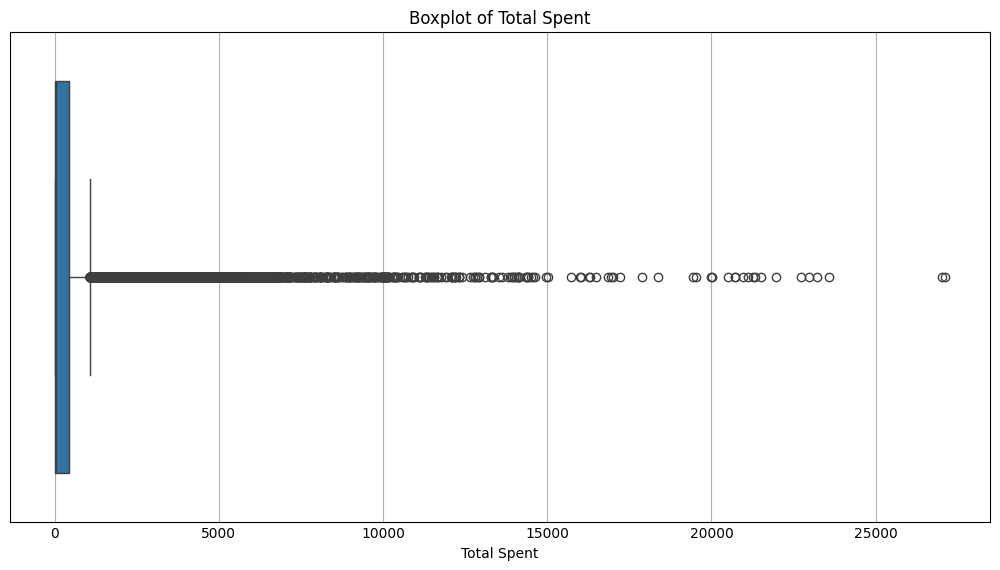

In [ ]:
# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['total_spent'])
plt.title('Boxplot of Total Spent')
plt.xlabel('Total Spent')
plt.show()

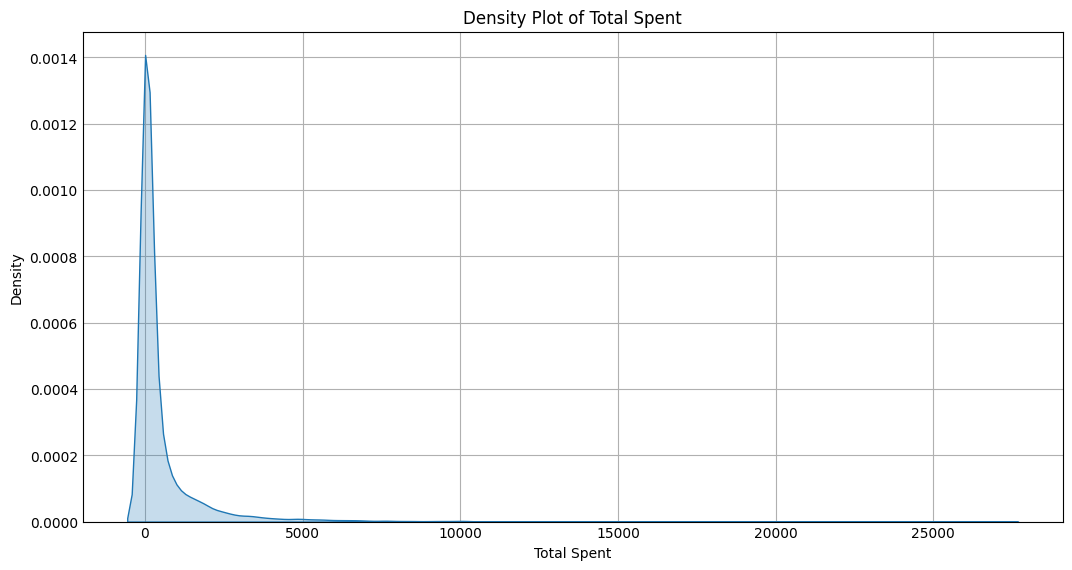

In [ ]:
# Density Plot
plt.figure(figsize=(10, 5))
sns.kdeplot(data['total_spent'], shade=True)
plt.title('Density Plot of Total Spent')
plt.xlabel('Total Spent')
plt.ylabel('Density')
plt.show()

In [ ]:
# Skewness
skewness = data['total_spent'].skew()
print(f'Skewness of Total Spent: {skewness}')

Skewness of Total Spent: 6.210447856078035


In [ ]:
# Kurtosis
kurtosis = data['total_spent'].kurtosis()
print(f'Kurtosis of Total Spent: {kurtosis}')

Kurtosis of Total Spent: 57.750628511264765


In [ ]:
from scipy import stats
import numpy as np
def count_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = np.where(z_scores > threshold)[0]
    return len(outliers)

# Example for total_spent
total_spent_outliers = count_outliers_zscore(data, 'total_spent')
print(f'Total spent outliers (Z-score): {total_spent_outliers}')


Total spent outliers (Z-score): 595


In [ ]:
def count_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers.shape[0]

# Example for total_spent
total_spent_outliers_iqr = count_outliers_iqr(data, 'total_spent')
print(f'Total spent outliers (IQR): {total_spent_outliers_iqr}')

Total spent outliers (IQR): 3936


In [ ]:
from sklearn.ensemble import IsolationForest

def count_outliers_isolation_forest(data, column):
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    predictions = iso_forest.fit_predict(data[[column]])
    outliers = (predictions == -1).sum()
    return outliers

# Example for total_spent
total_spent_outliers_iso = count_outliers_isolation_forest(data, 'total_spent')
print(f'Total spent outliers (Isolation Forest): {total_spent_outliers_iso}')

Total spent outliers (Isolation Forest): 2854


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

def count_outliers_lof(data, column):
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
    predictions = lof.fit_predict(data[[column]])
    outliers = (predictions == -1).sum()
    return outliers

# Example for total_spent
total_spent_outliers_lof = count_outliers_lof(data, 'total_spent')
print(f'Total spent outliers (LOF): {total_spent_outliers_lof}')

Total spent outliers (LOF): 2854


In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

def count_outliers_dbscan(data, column, eps=0.5, min_samples=5):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(data[[column]])
    # DBSCAN labels outliers as -1
    outliers = np.sum(labels == -1)
    return outliers

# Example for total_spent
total_spent_outliers_dbscan = count_outliers_dbscan(data, 'total_spent', eps=0.5, min_samples=5)
print(f'Total spent outliers (DBSCAN): {total_spent_outliers_dbscan}')

Total spent outliers (DBSCAN): 3858


In [ ]:
def winsorize_series(series, lower_quantile=0.05, upper_quantile=0.95):
    lower_bound = series.quantile(lower_quantile)
    upper_bound = series.quantile(upper_quantile)
    return series.clip(lower_bound, upper_bound)

# Example for total_spent
data['total_spent_winsorized'] = winsorize_series(data['total_spent'])
print(data[['total_spent', 'total_spent_winsorized']].describe())

        total_spent  total_spent_winsorized
count  28534.000000            28534.000000
mean     554.604671              411.873255
std     1460.307139              730.325287
min        0.000000                0.080000
25%        5.430000                5.430000
50%       53.285000               53.285000
75%      430.692500              430.692500
max    27125.360000             2695.521500


In [ ]:
def log_transform(series):
    # Adding a small constant to avoid log(0)
    return np.log1p(series)

# Example for total_spent
data['total_spent_log'] = log_transform(data['total_spent'])
print(data[['total_spent', 'total_spent_log']].describe())

        total_spent  total_spent_log
count  28534.000000     28534.000000
mean     554.604671         3.978676
std     1460.307139         2.497064
min        0.000000         0.000000
25%        5.430000         1.860975
50%       53.285000         3.994248
75%      430.692500         6.067714
max    27125.360000        10.208261


In [ ]:
def sqrt_transform(series):
    return np.sqrt(series)

# Example for total_spent
data['total_spent_sqrt'] = sqrt_transform(data['total_spent'])
print(data[['total_spent', 'total_spent_sqrt']].describe())

        total_spent  total_spent_sqrt
count  28534.000000      28534.000000
mean     554.604671         14.675697
std     1460.307139         18.418482
min        0.000000          0.000000
25%        5.430000          2.330236
50%       53.285000          7.299658
75%      430.692500         20.753132
max    27125.360000        164.697784


In [ ]:
import pandas as pd

def winsorize_series(series, lower_quantile=0.05, upper_quantile=0.95):
    lower_bound = series.quantile(lower_quantile)
    upper_bound = series.quantile(upper_quantile)
    return series.clip(lower_bound, upper_bound)

# Load your data into a DataFrame (assuming your data is in a DataFrame named 'data')
# data = pd.read_csv('your_dataset.csv')  # Uncomment this line if you're loading data from a CSV file

# Apply Winsorizing to the total_spent column
data['total_spent_winsorized'] = winsorize_series(data['total_spent'], lower_quantile=0.05, upper_quantile=0.95)

# Summary statistics before and after Winsorizing
print(data[['total_spent', 'total_spent_winsorized']].describe())

# Check the number of values changed by Winsorizing
outliers_winsorized = (data['total_spent'] != data['total_spent_winsorized']).sum()
print(f'Number of outliers adjusted by Winsorizing: {outliers_winsorized}')


        total_spent  total_spent_winsorized
count  28534.000000            28534.000000
mean     554.604671              411.873255
std     1460.307139              730.325287
min        0.000000                0.080000
25%        5.430000                5.430000
50%       53.285000               53.285000
75%      430.692500              430.692500
max    27125.360000             2695.521500
Number of outliers adjusted by Winsorizing: 2805


In [ ]:
# Skewness
skewness = data['impressions'].skew()
print(f'Skewness of impressions: {skewness}')

Skewness of impressions: 9.707668562591975


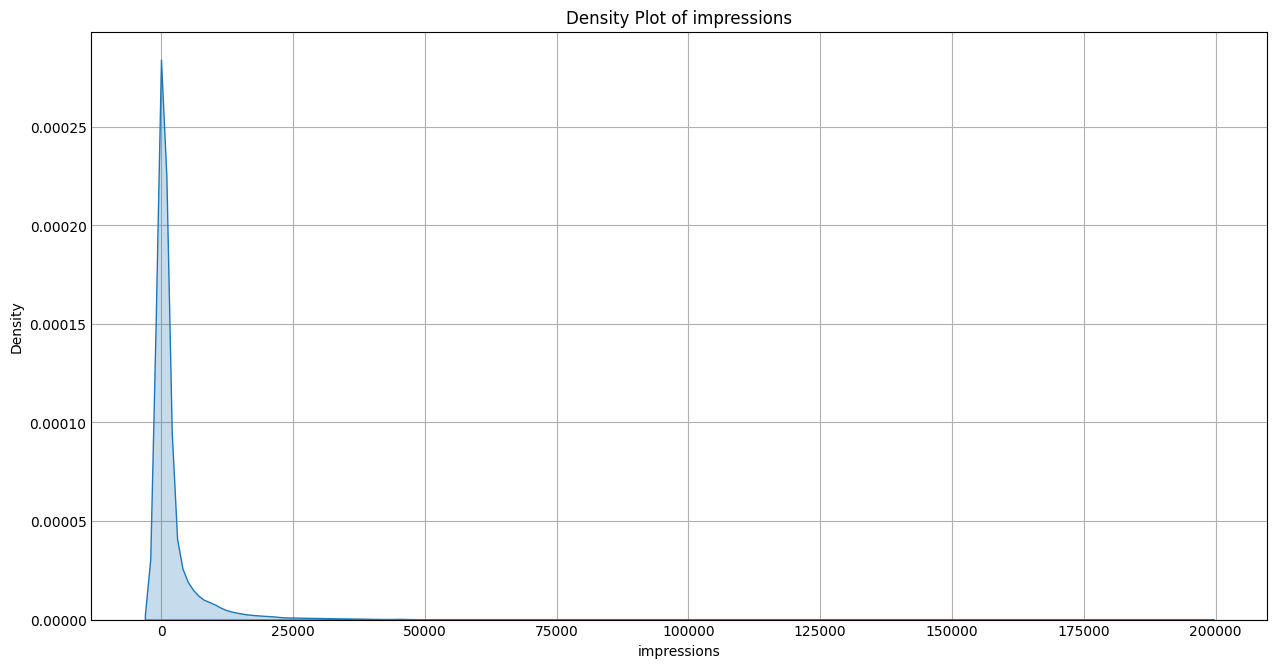

In [ ]:
column = 'impressions'

# Plot Density Plot
plt.figure(figsize=(12, 6))
sns.kdeplot(data[column], shade=True)
plt.title(f'Density Plot of {column}')
plt.xlabel(column)
plt.ylabel('Density')
plt.show()

In [ ]:
# Get the highest value in the impressions column
max_impressions = data['impressions'].max()
print(f'The highest value in the impressions column is: {max_impressions}')

The highest value in the impressions column is: 196585


In [ ]:
# Get the row with the highest value in the impressions column
max_impressions_row = data[data['impressions'] == max_impressions]
print('The row with the highest impressions value is:')
print(max_impressions_row)


The row with the highest impressions value is:
          dates                                campaign_name  \
2883 2024-03-21  USP_Marketing+MBA_New Leads Campaign_240224   

     campaign_start_date               creative_name  total_spent  \
2883                 NaT  USP_kavita&steffi_VideoAd6     14139.61   

      impressions  clicks  click_through_rate  leads  platform  \
2883       196585     712            0.362184   46.0  Facebook   

                            adset_name  
2883  Marketing+MBA All India - 240224  


In [ ]:
# Get the highest value in the clicks column
max_clicks = data['clicks'].max()
print(f'The highest value in the clicks column is: {max_clicks}')

The highest value in the clicks column is: 3361


In [ ]:
# Get the row with the highest value in the clicks column
max_clicks_row = data[data['clicks'] == max_clicks]
print('The row with the highest clicks value is:')
print(max_clicks_row)

The row with the highest clicks value is:
           dates                       campaign_name campaign_start_date  \
26761 2024-03-03  USP_Video_APTLTSKA_Lead-Gen_160224                 NaT   

      creative_name  total_spent  impressions  clicks  click_through_rate  \
26761      RG Video     10055.15       127907    3361              0.0263   

       leads platform                           adset_name  
26761   12.0   Google  Combined_targeting_Generic_APTSTNKA  


In [ ]:
# Get the highest value in the click_through_rate column
max_click_through_rate = data['click_through_rate'].max()
print(f'The highest value in the click_through_rate column is: {max_click_through_rate}')

The highest value in the click_through_rate column is: 200.0


In [ ]:
# Get the row with the highest value in the click_through_rate column
max_click_through_rate_row = data[data['click_through_rate'] == max_click_through_rate]
print('The row with the highest click_through_rate value is:')
print(max_click_through_rate_row)

The row with the highest click_through_rate value is:
           dates                                      campaign_name  \
2714  2024-01-09      USP_Video_More_Volume_No Logic_India_New Link   
12690 2023-12-25  CBO - USP Masterclass Cold [ 15th Dec ] - More...   
21681 2024-01-25                            USP_2_Lead-gen-1_220124   
25104 2024-01-23    USP_Program_Higher Intent_No Logic_India_220124   
26863 2024-03-31                    USP Study Abroad_Generic_240224   

      campaign_start_date                                      creative_name  \
2714                  NaT                            USP_Influencer_videoAd1   
12690                 NaT  #5 ( Graphic ) - Get Master's Degree in Just 1...   
21681                 NaT         #3 ( Graphic ) - Worried About GMAT Score?   
25104                 NaT         #3 ( Graphic ) - Worried About GMAT Score?   
26863                 NaT                                       USP_S7_Stony   

       total_spent  impressions  click

In [ ]:
# Get the highest value in the leads column
max_leads = data['leads'].max()
print(f'The highest value in the leads column is: {max_leads}')

The highest value in the leads column is: 153.0


In [ ]:
# Get the row with the highest value in the leads column
max_leads_row = data[data['leads'] == max_leads]
print('The row with the highest leads value is:')
print(max_leads_row)

The row with the highest leads value is:
           dates                  campaign_name campaign_start_date  \
21531 2024-03-20  USP_MS + Coop Campaign_240224                 NaT   

           creative_name  total_spent  impressions  clicks  \
21531  USP_RIT_1_Getpaid      23219.6        95212     638   

       click_through_rate  leads  platform  \
21531            0.670084  153.0  Facebook   

                                adset_name  
21531  MS + Coop All India Ad set - 240224  


In [ ]:
import pandas as pd

# Get the campaign name with the highest count
most_frequent_campaign = data['campaign_name'].value_counts().idxmax()
most_frequent_campaign_count = data['campaign_name'].value_counts().max()

print(f'The most frequently conducted campaign is: {most_frequent_campaign}')
print(f'The number of times it was conducted: {most_frequent_campaign_count}')

The most frequently conducted campaign is: USP Study Abroad_Generic_240224
The number of times it was conducted: 4583


In [ ]:
# Get the highest value in the campaign_name column
max_campaign_name = data['campaign_name'].max()
print(f'The highest value in the campaign_name column is: {max_campaign_name}')

The highest value in the campaign_name column is: xCBO - USP Masterclass Cold [ 7th Dec ] - Higher Intent - No Logic -  new link India


In [ ]:
# Get the row with the highest value in the campaign_name column
max_campaign_name_row = data[data['campaign_name'] == max_campaign_name]
print('The row with the highest campaign_name value is:')
print(max_campaign_name_row)

The row with the highest campaign_name value is:
           dates                                      campaign_name  \
8977  2023-12-08  xCBO - USP Masterclass Cold [ 7th Dec ] - High...   
12332 2023-12-07  xCBO - USP Masterclass Cold [ 7th Dec ] - High...   
12467 2023-12-08  xCBO - USP Masterclass Cold [ 7th Dec ] - High...   
12468 2023-12-08  xCBO - USP Masterclass Cold [ 7th Dec ] - High...   
12469 2023-12-07  xCBO - USP Masterclass Cold [ 7th Dec ] - High...   
...          ...                                                ...   
28308 2023-12-10  xCBO - USP Masterclass Cold [ 7th Dec ] - High...   
28323 2023-12-10  xCBO - USP Masterclass Cold [ 7th Dec ] - High...   
28397 2023-12-09  xCBO - USP Masterclass Cold [ 7th Dec ] - High...   
28398 2023-12-09  xCBO - USP Masterclass Cold [ 7th Dec ] - High...   
28410 2023-12-10  xCBO - USP Masterclass Cold [ 7th Dec ] - High...   

      campaign_start_date                                      creative_name  \
8977              

In [ ]:
# Group by campaign_name and calculate summary statistics for total_spent
summary_stats = data.groupby('campaign_name')['total_spent'].describe()
print(summary_stats)

                                                     count         mean  \
campaign_name                                                             
CBO - USP Masterclass Cold [ 15th Dec ] - Highe...   515.0   362.525204   
CBO - USP Masterclass Cold [ 15th Dec ] - More ...   800.0   171.041387   
CBO - USP Masterclass Cold [ 23rd Nov ] - Highe...  1777.0   110.441964   
CBO - USP Masterclass Cold [ 23rd Nov ] - More ...   898.0   283.244053   
USP Masterclass Cold [ 14th Dec ] - Link Click Ad     80.0   130.656875   
USP Masterclass Cold [ 23rd Nov ] - More volume...   587.0   209.314395   
USP Masterclass Cold [ 31st Oct ] - Higher Inte...  1853.0   110.978408   
USP Masterclass Cold [ 31st Oct ] - More Volume...   793.0   137.596015   
USP Masterclass Cold [ 31st Oct ] - More volume...   830.0   111.429181   
USP Study Abroad_Generic_240224                     4583.0   464.037582   
USP_2_Lead-gen-1_220124                             1274.0   380.509152   
USP_2_Lead-gen-2_Top4-sta

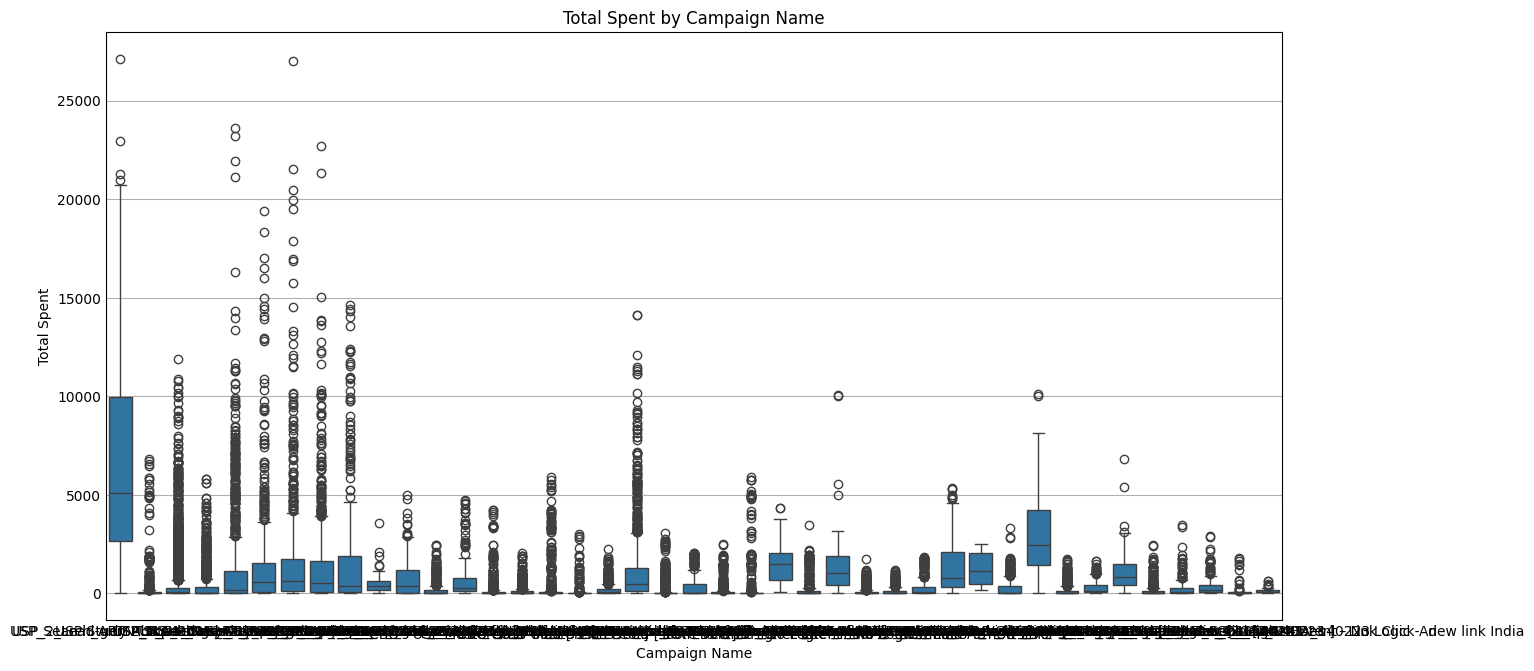

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='campaign_name', y='total_spent', data=data)
plt.title('Total Spent by Campaign Name')
plt.xlabel('Campaign Name')
plt.ylabel('Total Spent')
plt.show()

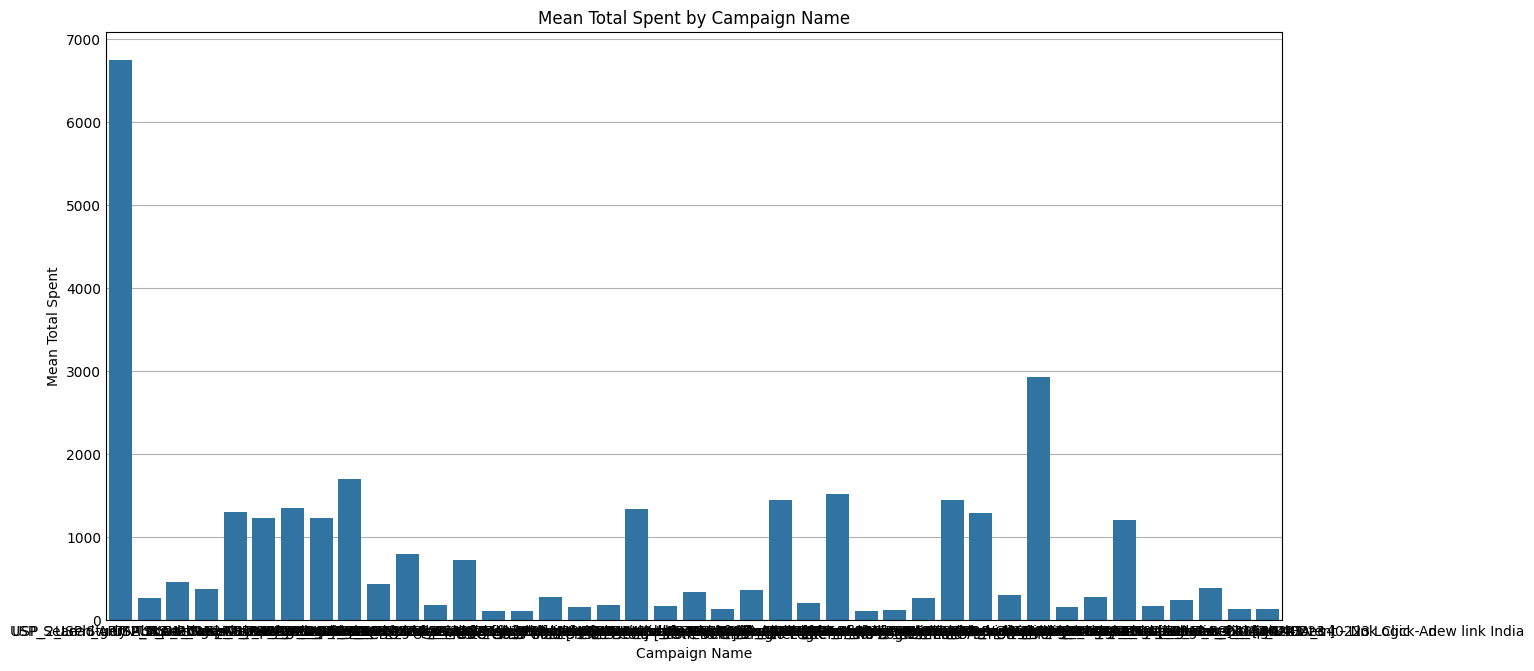

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='campaign_name', y='total_spent', data=data, estimator=np.mean, ci=None)
plt.title('Mean Total Spent by Campaign Name')
plt.xlabel('Campaign Name')
plt.ylabel('Mean Total Spent')
plt.show()

In [ ]:
import scipy.stats as stats

# Perform ANOVA
anova_result = stats.f_oneway(*[data[data['campaign_name'] == campaign]['total_spent'] for campaign in data['campaign_name'].unique()])
print('ANOVA result:', anova_result)

ANOVA result: F_onewayResult(statistic=159.95489835473268, pvalue=0.0)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
data['campaign_name'] = LabelEncoder().fit_transform(data['campaign_name'])
data['platform'] = LabelEncoder().fit_transform(data['platform'])

In [ ]:
# Define features and target
features = data.drop(columns=['total_spent', 'campaign_start_date'])
target = data['total_spent']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

# Feature importance
feature_importances = pd.DataFrame(model.feature_importances_, index=features.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

TypeError: float() argument must be a string or a real number, not 'Timestamp'